### heart failure data 数据分析

In [18]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('F:\ml-data\heart-failure\datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
# 计算每个字段数据为空（缺失数据）的比例
for col in df.columns:
    null_num = df[col].isnull().sum()
    all_num = len(df)
    print(col, str(round(100* null_num/all_num, 2)) + '%')


age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.0%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
smoking 0.0%
time 0.0%
DEATH_EVENT 0.0%


In [22]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
import matplotlib.pyplot as plt

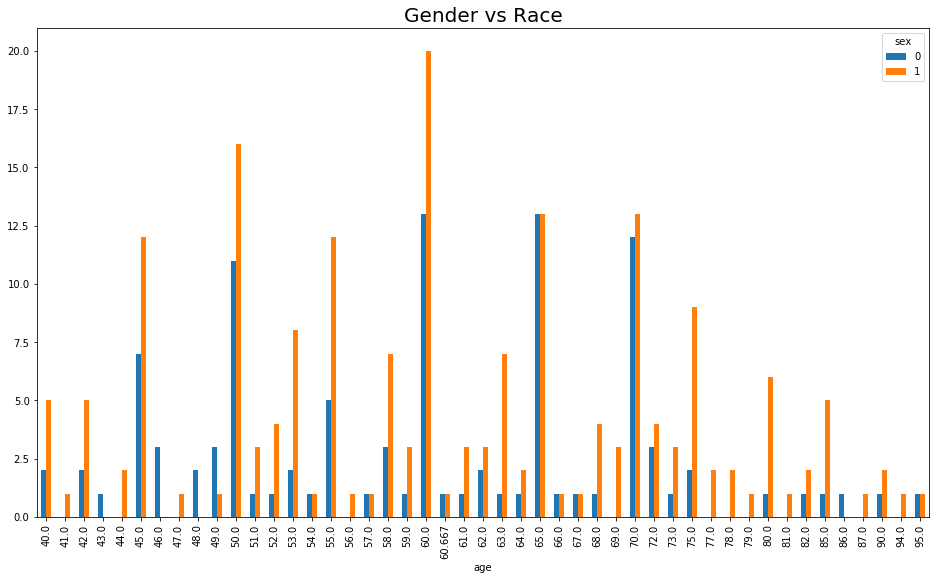

In [32]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(df['age'], df['sex'])
x.plot(kind = 'bar', stacked = False)
plt.title('age vs sex', fontweight = 30, fontsize = 20)
plt.show()

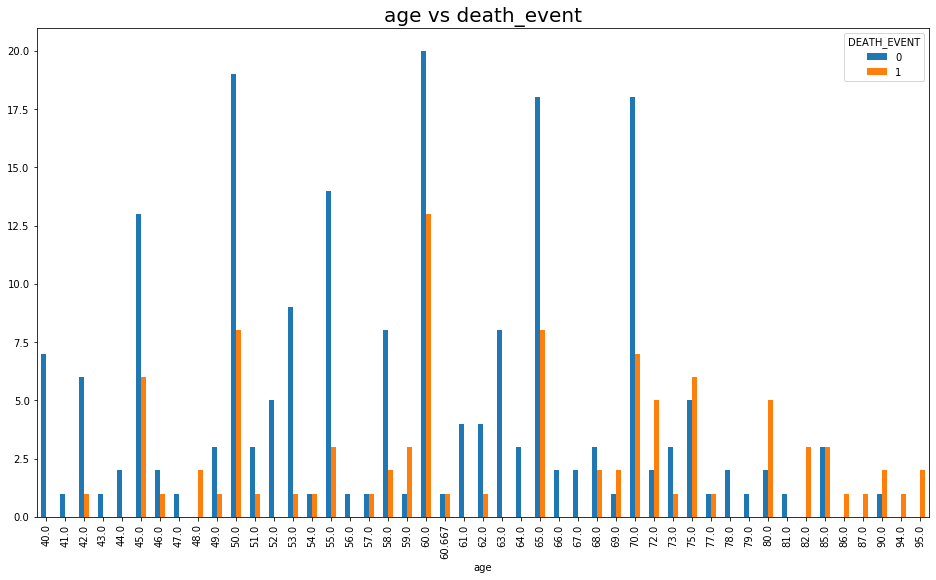

In [33]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(df['age'], df['DEATH_EVENT'])
x.plot(kind = 'bar', stacked = False)
plt.title('age vs death_event', fontweight = 30, fontsize = 20)
plt.show()

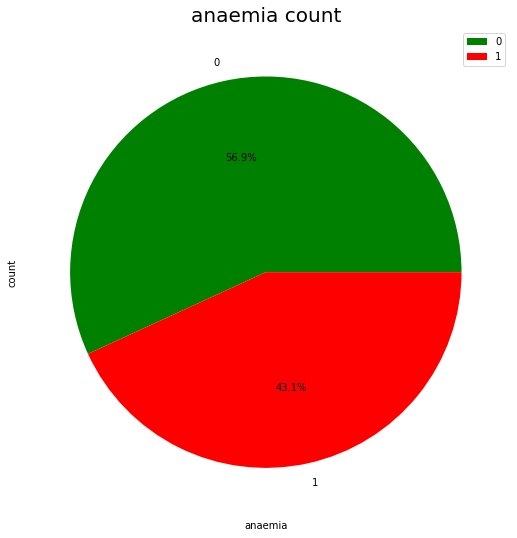

In [44]:
df['anaemia'].value_counts().plot.pie(colors = ['green', 'red'], autopct='%1.1f%%')   # 饼图
plt.title('anaemia count', fontweight = 30, fontsize = 20)
plt.xlabel('anaemia')
plt.ylabel('count')
plt.legend()
plt.show()

### 模型训练

In [45]:
x = df.copy()

In [46]:
y = x['DEATH_EVENT']
x = x.drop(['DEATH_EVENT'], axis = 1)

In [47]:
x.shape

(299, 12)

In [49]:
y.shape

(299,)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [79]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)
train_x.shape

(239, 12)

In [80]:
log_reg = LogisticRegression(random_state=0, max_iter= 2000)
log_reg.fit(train_x, train_y)
predict_y = log_reg.predict(test_x)
print('log_reg accuracy:', accuracy_score(test_y, predict_y))

log_reg accuracy: 0.7333333333333333


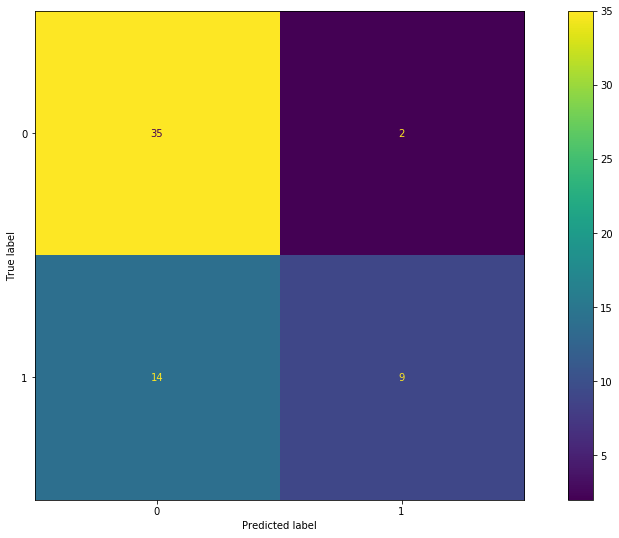

In [81]:
plot_confusion_matrix(log_reg, test_x, test_y)
plt.show()

In [82]:
print('log_reg f1-score', f1_score(test_y, predict_y))
print('log_reg precision', precision_score(test_y, predict_y))
print('log_reg recall', recall_score(test_y, predict_y))

log_reg f1-score 0.5294117647058824
log_reg precision 0.8181818181818182
log_reg recall 0.391304347826087


### lightGBM lgbmclasssifer

In [65]:
from lightgbm import LGBMClassifier

In [84]:
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(train_x, train_y)
predict_y = lgbm.predict(test_x)
print('lgbm f1-score', f1_score(test_y, predict_y))
print('lgbm precision', precision_score(test_y, predict_y))
print('lgbm recall', recall_score(test_y, predict_y))
print('lgbm accuracy:', accuracy_score(test_y, predict_y))

lgbm f1-score 0.7804878048780488
lgbm precision 0.8888888888888888
lgbm recall 0.6956521739130435
lgbm accuracy: 0.85


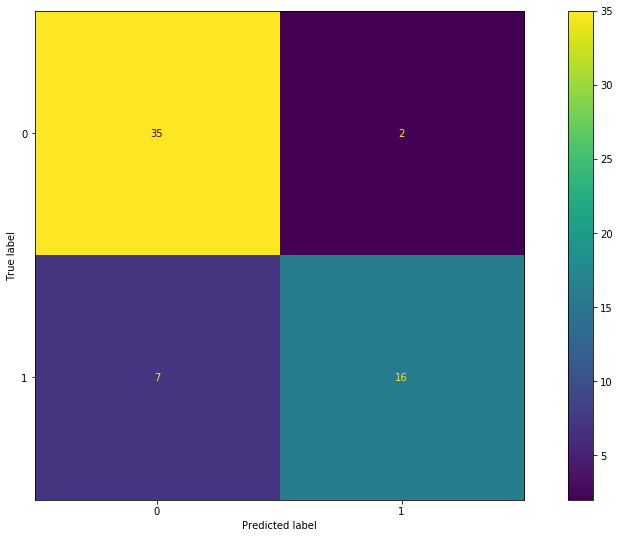

In [85]:
plot_confusion_matrix(lgbm, test_x, test_y)
plt.show()

### 去除掉相关系数少于0。05的列 （卡方检验的相关性经验值）

In [86]:
for col in train_x.columns:
    if abs(train_x[col].corr(train_y)) < 0.05:
        new_train_x = train_x.drop([col], axis=1)
        new_test_x = test_x.drop([col], axis=1)
new_train_x.shape

(239, 11)

In [87]:
new_test_x.shape

(60, 11)

In [88]:
lgbm1 = LGBMClassifier(random_state=0)
lgbm1.fit(new_train_x, train_y)
predict_y = lgbm1.predict(new_test_x)
print('lgbm1 f1-score', f1_score(test_y, predict_y))
print('lgbm1 precision', precision_score(test_y, predict_y))
print('lgbm1 recall', recall_score(test_y, predict_y))
print('lgbm1 accuracy:', accuracy_score(test_y, predict_y))

lgbm1 f1-score 0.7906976744186046
lgbm1 precision 0.85
lgbm1 recall 0.7391304347826086
lgbm1 accuracy: 0.85


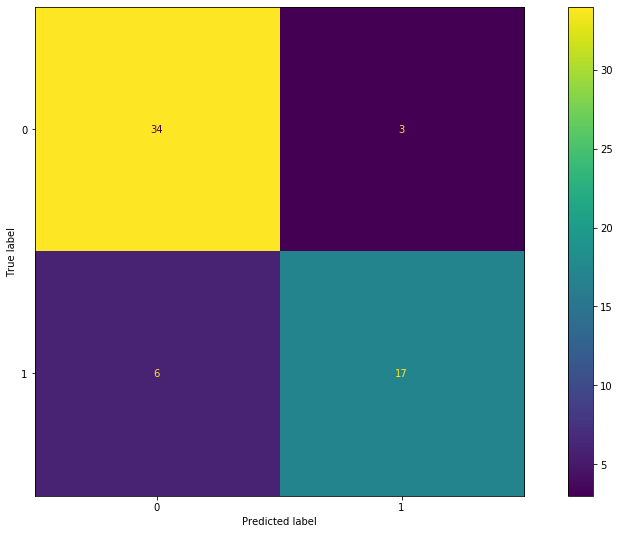

In [89]:
plot_confusion_matrix(lgbm1, new_test_x, test_y)
plt.show()

### xgboost 

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(random_state = 0)

In [90]:
xgb.fit(train_x, train_y)
predict_y = xgb.predict(test_x)

In [91]:
print('xgb f1-score', f1_score(test_y, predict_y))
print('xgb precision', precision_score(test_y, predict_y))
print('xgb recall', recall_score(test_y, predict_y))
print('xgb accuracy', accuracy_score(test_y, predict_y))

xgb f1-score 0.7441860465116279
xgb precision 0.8
xgb recall 0.6956521739130435
xgb accuracy 0.8166666666666667


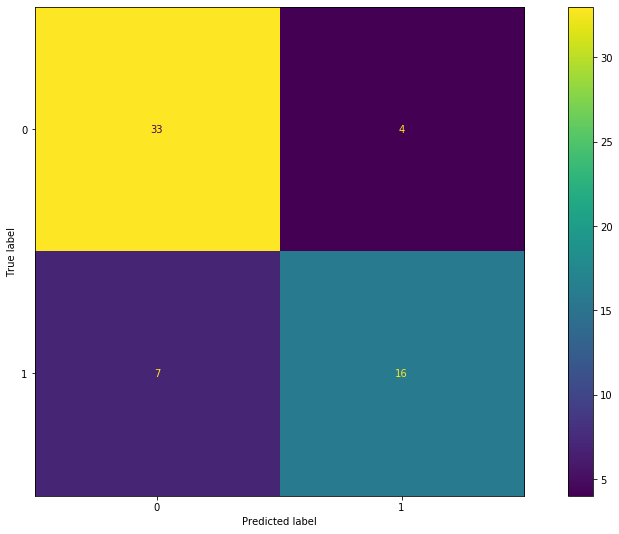

In [92]:
plot_confusion_matrix(xgb, test_x, test_y)
plt.show()

### optimization  super-param

In [95]:
import optuna
from optuna.samplers import TPESampler

In [96]:
def create_lgbm_clf(trial):
    max_depth = trial.suggest_int('max_depth', 2, 30)
    n_estimators = trial.suggest_int('n_stimeators', 1, 500)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
    num_leaves = trial.suggest_int('num_leaves', 2, 5000)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
    lgbm_clf = LGBMClassifier(learning_rate = learning_rate, n_estimators = n_estimators, 
                              max_depth= max_depth, num_leaves = num_leaves, 
                              min_child_samples=min_child_samples, random_state=0)
    return lgbm_clf
    

In [99]:
sampler = TPESampler()
def objective(trial):
    lgbm_clf = create_lgbm_clf(trial)
    lgbm_clf.fit(train_x, train_y)
    predict_y = lgbm_clf.predict(test_x)
    f1score = f1_score(test_y, predict_y)
    return f1score


In [100]:
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials = 100)

[I 2020-09-09 16:44:34,982] A new study created in memory with name: no-name-64b5b20d-b9e0-4b0d-82bb-eb1595e1ff91
[I 2020-09-09 16:44:35,041] Trial 0 finished with value: 0.0 and parameters: {'max_depth': 3, 'n_stimeators': 266, 'learning_rate': 0.7331371864767439, 'num_leaves': 4831, 'min_child_samples': 123}. Best is trial 0 with value: 0.0.
[I 2020-09-09 16:44:35,405] Trial 1 finished with value: 0.7999999999999999 and parameters: {'max_depth': 15, 'n_stimeators': 429, 'learning_rate': 0.9959599944179823, 'num_leaves': 4557, 'min_child_samples': 90}. Best is trial 1 with value: 0.7999999999999999.
[I 2020-09-09 16:44:35,454] Trial 2 finished with value: 0.0 and parameters: {'max_depth': 27, 'n_stimeators': 214, 'learning_rate': 0.9919296144970743, 'num_leaves': 3584, 'min_child_samples': 191}. Best is trial 1 with value: 0.7999999999999999.
[I 2020-09-09 16:44:35,507] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 19, 'n_stimeators': 36, 'learning_rate': 0.7531012052

In [101]:
lgbm_best_param = study.best_params
lgbm_best_param

{'max_depth': 12,
 'n_stimeators': 482,
 'learning_rate': 0.7718608822443026,
 'num_leaves': 1466,
 'min_child_samples': 3}

In [104]:
lgbm_best_param['random_state'] = 0
optimized_lgbm_clf = LGBMClassifier(**lgbm_best_param)
optimized_lgbm_clf.fit(train_x, train_y)
predict_y = optimized_lgbm_clf.predict(test_x)
print('optimized_lgbm_clf accuracy: ', accuracy_score(test_y, predict_y))
print('optimized_lgbm_clf f1-score', f1_score(test_y, predict_y))
print('optimized_lgbm_clf precision', precision_score(test_y, predict_y))
print('optimized_lgbm_clf recall', recall_score(test_y, predict_y))

[LightGBM] [Warning] Unknown parameter: n_stimeators
optimized_lgbm_clf accuracy:  0.8833333333333333
optimized_lgbm_clf f1-score 0.8292682926829269
optimized_lgbm_clf precision 0.9444444444444444
optimized_lgbm_clf recall 0.7391304347826086


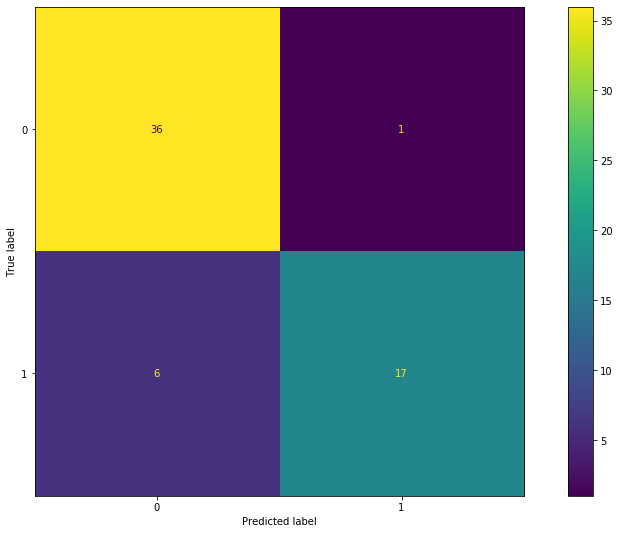

In [103]:
plot_confusion_matrix(optimized_lgbm_clf, test_x, test_y)
plt.show()

### optimization  super-param,  feature-select

In [105]:
for i in range(1, len(train_x.columns) + 1):
    rfe = RFE(estimator=DecisionTreeClassifier(random_state =0), n_features_to_select=i)
    pipeline = Pipeline(steps=[
        ('feature-select', rfe),
        ('lgbm_clf', LGBMClassifier(random_state = 0))
    ])
    pipeline.fit(train_x, train_y)
    predict_y = pipeline.predict(test_x)
    print('Number of features: ', i)
    print('lgbm_clf f1-score', f1_score(test_y, predict_y))

Number of features:  1
lgbm_clf f1-score 0.7441860465116279
Number of features:  2
lgbm_clf f1-score 0.7317073170731708
Number of features:  3
lgbm_clf f1-score 0.7317073170731708
Number of features:  4
lgbm_clf f1-score 0.8095238095238095
Number of features:  5
lgbm_clf f1-score 0.7317073170731708
Number of features:  6
lgbm_clf f1-score 0.8095238095238095
Number of features:  7
lgbm_clf f1-score 0.8372093023255814
Number of features:  8
lgbm_clf f1-score 0.7999999999999999
Number of features:  9
lgbm_clf f1-score 0.7906976744186046
Number of features:  10
lgbm_clf f1-score 0.8292682926829269
Number of features:  11
lgbm_clf f1-score 0.8292682926829269
Number of features:  12
lgbm_clf f1-score 0.7804878048780488


In [117]:

def create_lgbm_clf(trial):
    rfe =  RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=7)
    max_depth = trial.suggest_int("max_depth", 2, 30)
    n_estimators = trial.suggest_int("n_estimators", 1, 500)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
    num_leaves = trial.suggest_int("num_leaves", 2, 5000)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
    lgbm_clf = Pipeline(
        steps=[
            ('feature-select',rfe), 
            ('lgbm_clf', LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, 
                                 max_depth=max_depth, num_leaves=num_leaves, 
                                 min_child_samples=min_child_samples, random_state=0
                                )
            )
        ])
    return lgbm_clf

In [118]:
def objective(trial):
    lgbm_clf = create_lgbm_clf(trial)
    lgbm_clf.fit(train_x, train_y)
    predict_y = lgbm_clf.predict(test_x)
    score = f1_score(test_y, predict_y)
    return score


In [119]:
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2020-09-09 17:32:44,372] A new study created in memory with name: no-name-3c15deb8-996d-400e-a056-67dc899a1d64
[I 2020-09-09 17:32:44,493] Trial 0 finished with value: 0.6153846153846153 and parameters: {'max_depth': 24, 'n_estimators': 245, 'learning_rate': 0.3473668099334806, 'num_leaves': 1978, 'min_child_samples': 106}. Best is trial 0 with value: 0.6153846153846153.
[I 2020-09-09 17:32:44,746] Trial 1 finished with value: 0.6666666666666667 and parameters: {'max_depth': 18, 'n_estimators': 350, 'learning_rate': 0.6617734254818693, 'num_leaves': 4444, 'min_child_samples': 74}. Best is trial 1 with value: 0.6666666666666667.
[I 2020-09-09 17:32:44,860] Trial 2 finished with value: 0.761904761904762 and parameters: {'max_depth': 10, 'n_estimators': 102, 'learning_rate': 0.24992370577410933, 'num_leaves': 3106, 'min_child_samples': 21}. Best is trial 2 with value: 0.761904761904762.
[I 2020-09-09 17:32:44,924] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 10, 'n_es

In [120]:
best_lgbm_param = study.best_params
best_lgbm_param

{'max_depth': 3,
 'n_estimators': 59,
 'learning_rate': 0.17064885458443496,
 'num_leaves': 3482,
 'min_child_samples': 3}

In [121]:
best_lgbm_param['random_state'] = 0
optimized_lgbm_clf = LGBMClassifier(**lgbm_best_param)
rfe = RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=7)
pipeline = Pipeline(steps=[
    ('feature-select',rfe), 
    ('lgbm-clf', optimized_lgbm_clf)
])
pipeline.fit(train_x, train_y)
predict_y = pipeline.predict(test_x)
print('pipeline accuracy: ', accuracy_score(test_y, predict_y))
print('pipeline f1-score', f1_score(test_y, predict_y))
print('pipeline precision', precision_score(test_y, predict_y))
print('opipeline recall', recall_score(test_y, predict_y))

[LightGBM] [Warning] Unknown parameter: n_stimeators
pipeline accuracy:  0.85
pipeline f1-score 0.7906976744186046
pipeline precision 0.85
opipeline recall 0.7391304347826086


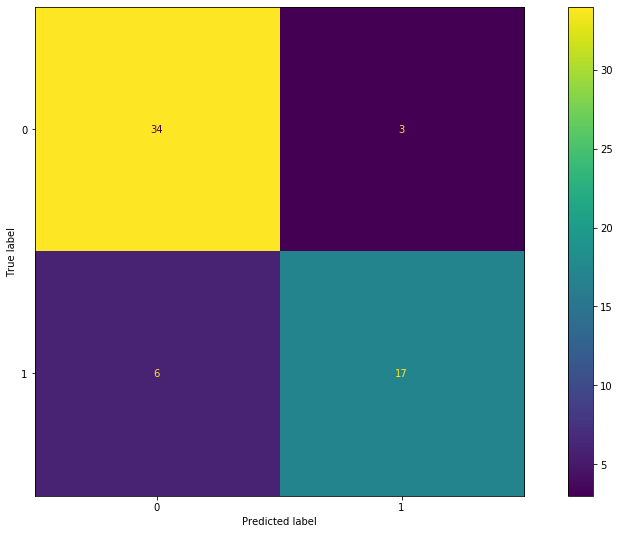

In [122]:
plot_confusion_matrix(pipeline, test_x, test_y)
plt.show()